In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import pandas as pd
import cv2
import glob
import numpy as np
import random
from google.colab.patches import cv2_imshow

In [0]:
train_x_list=glob.glob("drive/My Drive/satimages/nopath/*.png")
test_x_list = glob.glob("drive/My Drive/satimages/path/*.png")

In [0]:
train_images = []
test_images = []
for i in range(len(train_x_list)):
  train_images.append(cv2.imread(train_x_list[i]))
  test_images.append(cv2.imread(test_x_list[i]))
train = np.array(train_images)
train = np.true_divide(train,255)
test = np.array(test_images)
test = np.true_divide(test,255)
print(train.shape)
print(test.shape)

(328, 66, 66, 3)
(328, 66, 66, 3)


In [0]:
x_train=np.array(train[:320]).astype('float32')
x_test=np.array(test[:320]).astype('float32')
x_train = np.reshape(x_train, (len(x_train), 66, 66,3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 66,66,3))

In [0]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


MODEL 2; BIG ARCHI

In [0]:
model2 = Sequential()
inp=(66,66,3)
model2.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(64, (3, 3),padding="same"))
model2.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(128, (3, 3),padding="same"))
model2.add(Activation('relu'))
model2.add(Conv2D(256, (5, 5), input_shape=inp,padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(256, (5, 5),padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(128, (5, 5),padding="same"))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (7, 7), input_shape=inp,padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(32, (7, 7),padding="same"))
model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model2.add(Conv2D(32, (7, 7),padding="same"))
model2.add(Activation('relu'))
#model2.add(UpSampling2D())
model2.add(Conv2D(3, (1, 1),padding="same"))
model2.summary()
model2.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model2.fit(x_train, x_test,
                epochs=300,
                batch_size=1,
                shuffle=True)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 66, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 66, 66, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 66, 66, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 66, 66, 256)   

In [0]:
testset=np.array(train[320:]).astype('float32')
testset = np.reshape(testset, (len(testset), 66,66,3))
testsetoutput=np.array(test[320:]).astype('float32')
testsetoutput = np.reshape(testsetoutput, (len(testset), 66,66,3))
decoded_imgs = model2.predict(testset)

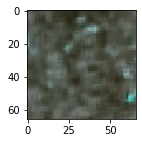

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


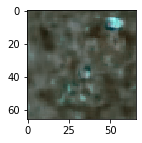

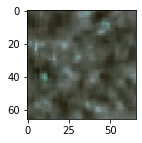

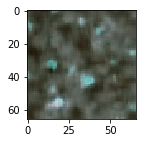

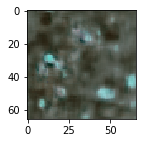

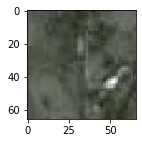

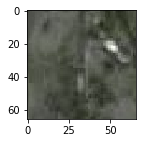

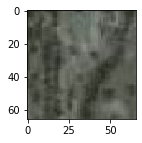

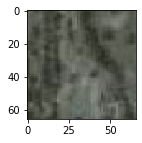

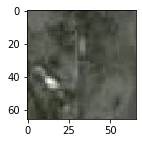

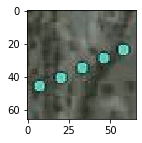

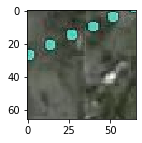

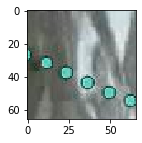

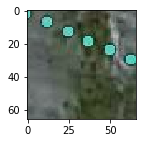

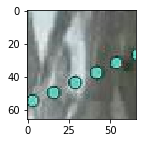

In [0]:
for k in range(5):
  decoded = np.asarray(decoded_imgs[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testset[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testsetoutput[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()

MODEL 3; SMALL ARCHI

In [0]:
model3 = Sequential()
inp=(66,66,3)
model3.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(64, (3, 3),padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(128, (5, 5),padding="same"))
model3.add(Activation('relu'))
model3.add(Conv2D(256, (5, 5), input_shape=inp,padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(64, (7, 7),padding="same"))
model3.add(Activation('relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(32, (7, 7),padding="same"))
model3.add(Activation('relu'))
#model3.add(UpSampling2D())
model3.add(Conv2D(3, (1, 1),padding="same"))
model3.summary()
model3.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model3.fit(x_train, x_test,
                epochs=300,
                batch_size=1,
                shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 66, 66, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 66, 66, 64)        18496     
_________________________________________________________________
activation_11 (Activation)   (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 66, 66, 128)       204928    
_________________________________________________________________
activation_12 (Activation)   (None, 66, 66, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 66, 66, 256)      

In [0]:
testset=np.array(train[320:]).astype('float32')
testset = np.reshape(testset, (len(testset), 66,66,3))
testsetoutput=np.array(test[320:]).astype('float32')
testsetoutput = np.reshape(testsetoutput, (len(testset), 66,66,3))
decoded_imgs = model3.predict(testset)

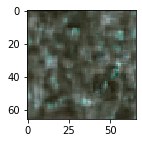

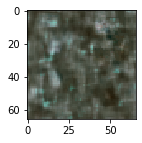

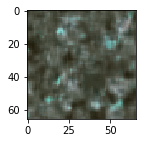

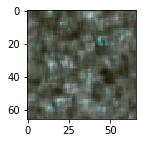

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


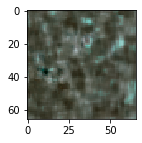

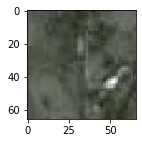

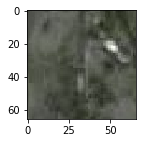

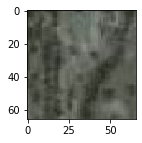

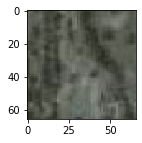

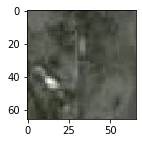

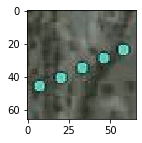

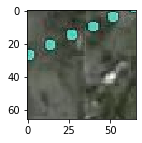

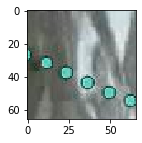

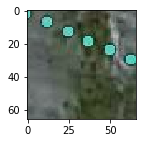

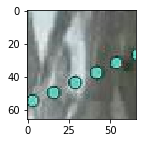

In [0]:
for k in range(5):
  decoded = np.asarray(decoded_imgs[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testset[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testsetoutput[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()

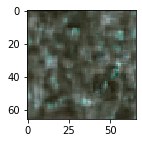

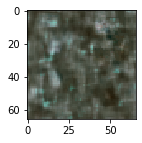

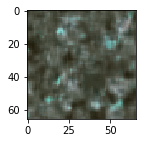

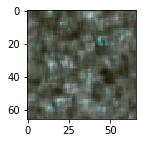

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


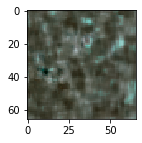

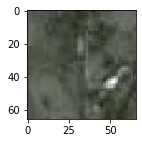

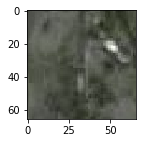

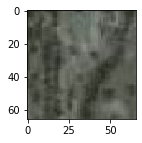

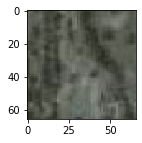

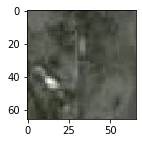

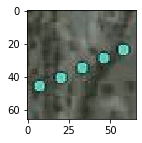

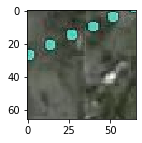

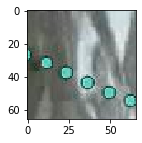

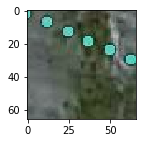

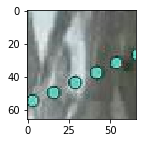

In [0]:
'''
import math
for k in range(5):
  decoded = np.asarray(decoded_imgs[k])
  data = decoded.reshape(66,66,3)
  data2 = np.multiply(decoded,255)
  data2 = np.reshape(data2,(66,66,3))
  #data2 = math.floor(np.reshape(np.multiply(decoded,255),(66,66,3)))
  cv2.imwrite("decoded_"+str(k)+".png",data2)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testset[k])
  data = decoded.reshape(66,66,3)
  data2 = np.multiply(decoded,255)
  data2 = np.reshape(data2,(66,66,3))
  cv2.imwrite("test_"+str(k)+".png",data2)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testsetoutput[k])
  data = decoded.reshape(66,66,3)
  data2 = np.multiply(decoded,255)
  data2 = np.reshape(data2,(66,66,3))
  cv2.imwrite("expectedoutput_"+str(k)+".png",data2)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
  '''

MODEL 4; BIG ARCHI; OTHER ARCHI

In [0]:
model4 = Sequential()
inp=(66,66,3)
model4.add(Conv2D(32, (3, 3), input_shape=inp,padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(32, (3, 3),padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(64, (3, 3),padding="same"))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (5, 5), input_shape=inp,padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(128, (5, 5),padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(64, (5, 5),padding="same"))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (7, 7), input_shape=inp,padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(32, (7, 7),padding="same"))
model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model4.add(Conv2D(32, (7, 7),padding="same"))
model4.add(Activation('relu'))
#model4.add(UpSampling2D())
model4.add(Conv2D(3, (1, 1),padding="same"))
model4.summary()
model4.compile(optimizer='adadelta', loss='mean_squared_error',metrics=['accuracy'])

model4.fit(x_train, x_test,
                epochs=300,
                batch_size=1,
                shuffle=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 66, 66, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 66, 66, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 66, 66, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 66, 66, 64)       

In [0]:
testset=np.array(train[320:]).astype('float32')
testset = np.reshape(testset, (len(testset), 66,66,3))
testsetoutput=np.array(test[320:]).astype('float32')
testsetoutput = np.reshape(testsetoutput, (len(testset), 66,66,3))
decoded_imgs = model4.predict(testset)

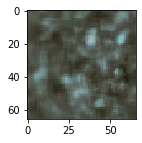

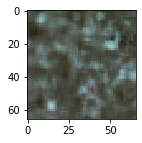

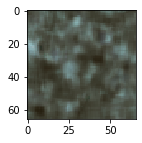

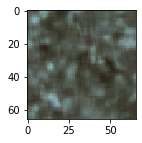

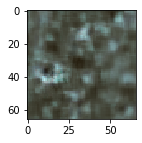

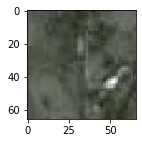

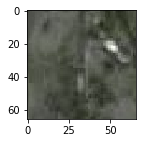

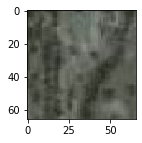

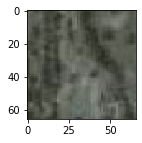

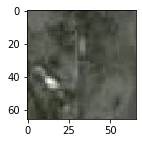

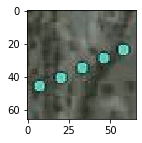

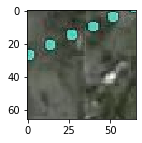

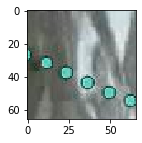

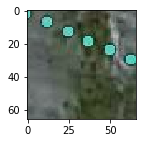

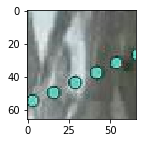

In [0]:
for k in range(5):
  decoded = np.asarray(decoded_imgs[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testset[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()
for k in range(5):
  decoded = np.asarray(testsetoutput[k])
  data = decoded.reshape(66,66,3)
  plt.figure(figsize=(2,2))
  plt.imshow(data)
  plt.show()